# Notebook 2: Data Exploratory Analysis
## Introduction
# Loads cleaned data from Notebook 1, performs stats, visualizations, correlations, decomposition.
# Justification: EDA identifies patterns (e.g., humidity-PM2.5 correlation) for feature selection; monthly decomposition reveals seasonal trends linked to SDG 13 (climate action).


        pm25_value         temp     humidity   wind_speed     wind_dir  \
count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000   
mean    150.171746    26.879674    84.354655     5.853717   161.358113   
std       4.366401     2.763849    13.504580     3.221374   113.245794   
min      48.000000    22.100000    47.000000     0.000000     1.000000   
25%     150.500000    24.500000    73.000000     3.600000    45.000000   
50%     150.500000    26.400000    88.000000     5.300000   159.000000   
75%     150.500000    29.100000    97.000000     7.900000   257.000000   
max     150.500000    33.900000   100.000000    19.800000   360.000000   

       precipitation  
count    4049.000000  
mean        0.320128  
std         1.286523  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.100000  
max        21.600000  


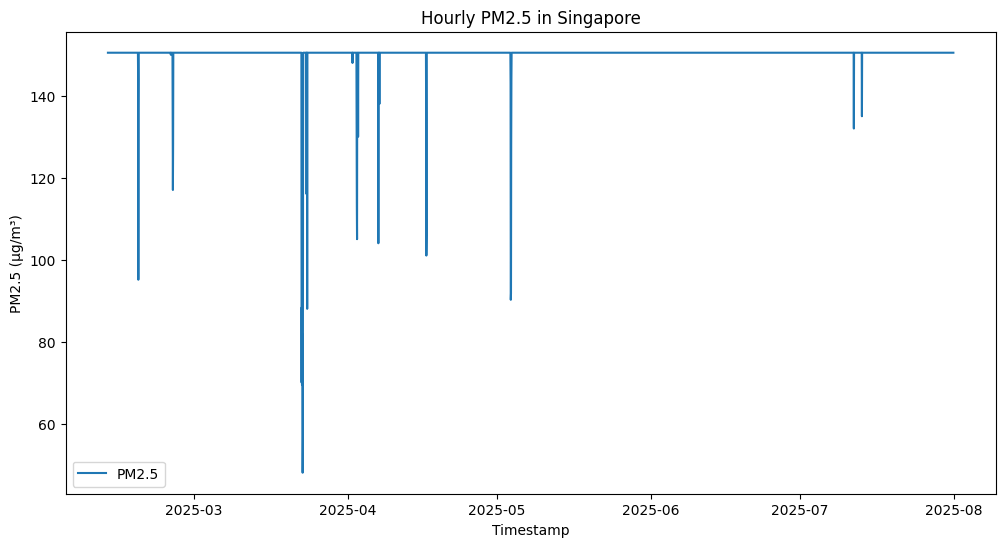

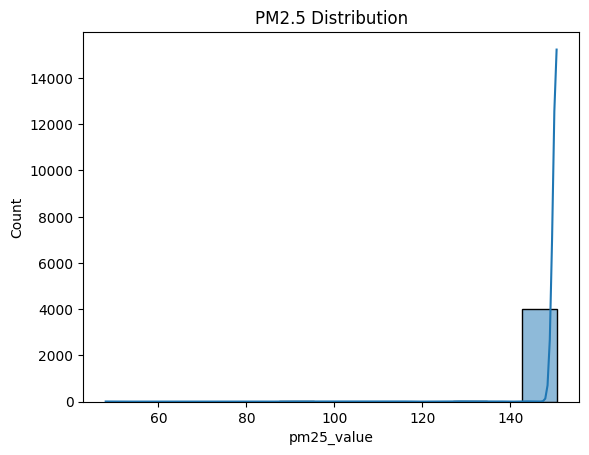

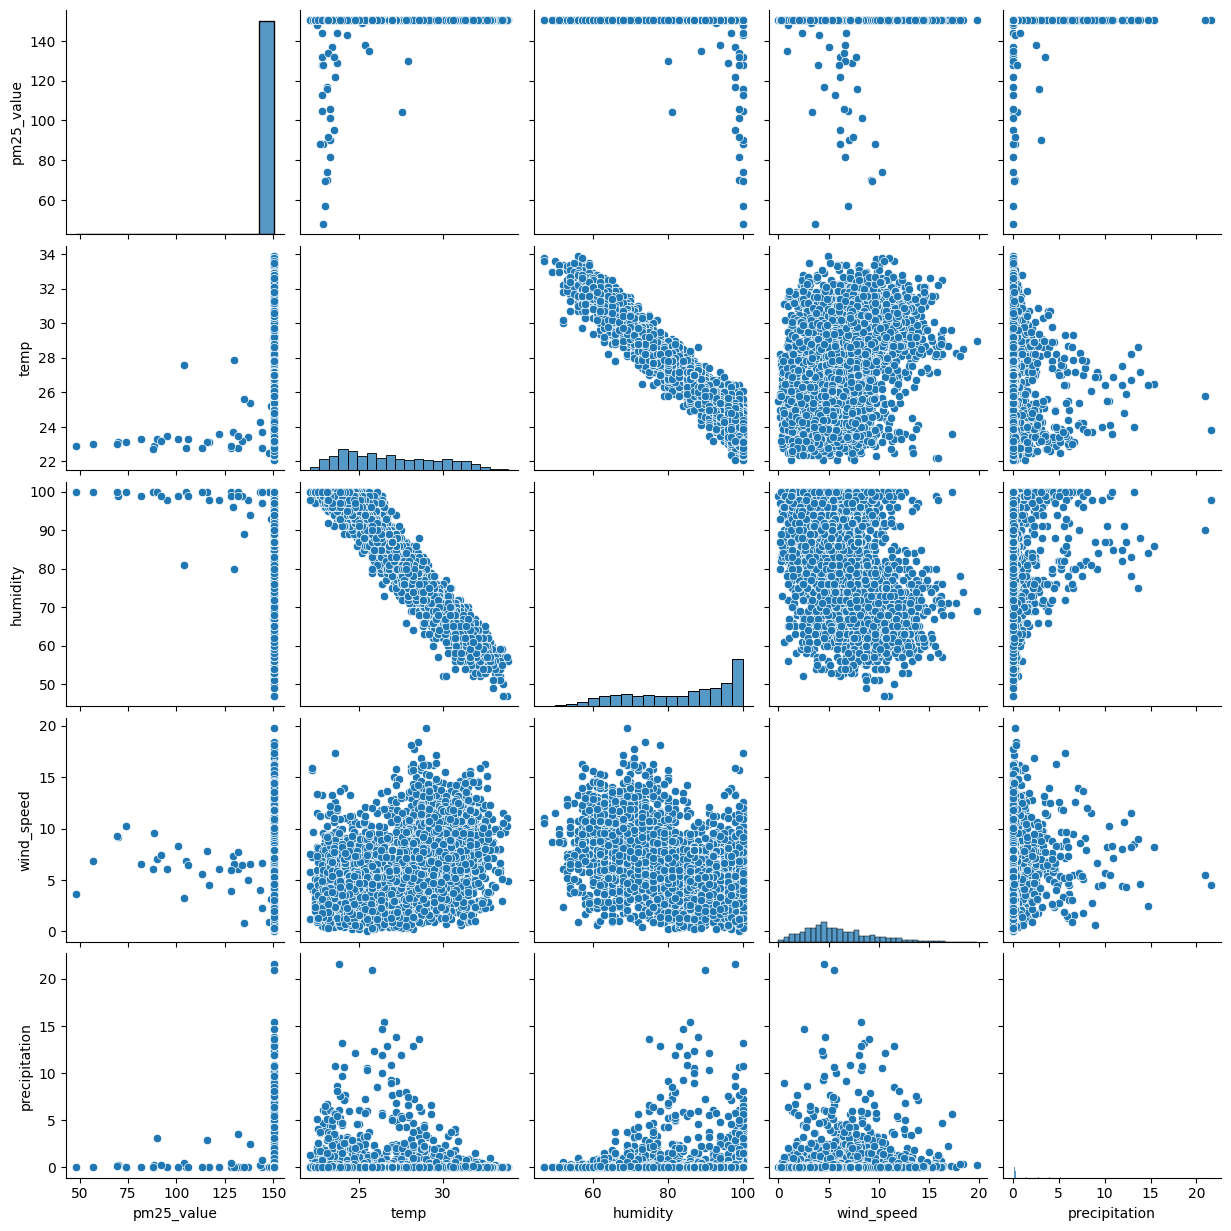

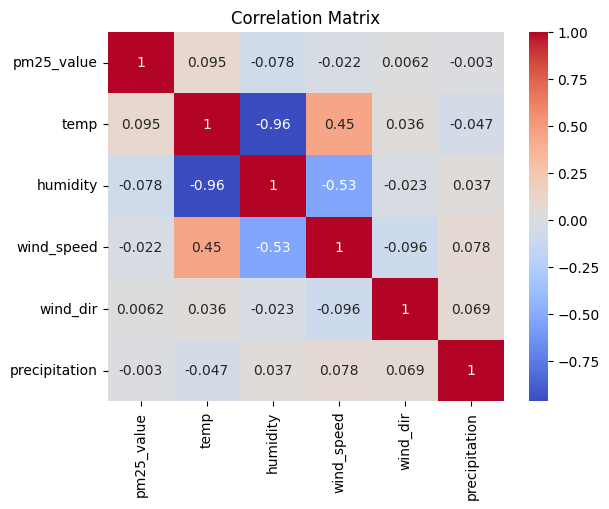

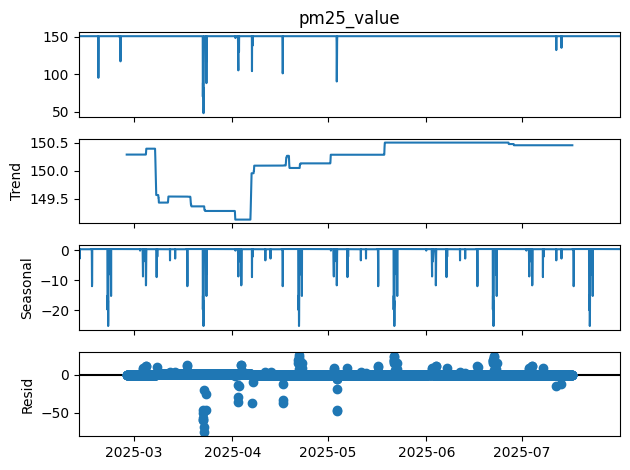

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

base_processed_file = '/content/drive/MyDrive/sensor_12178556_Singapore_pm25_weather_hourly_data_processed_capped.csv'
df = pd.read_csv(base_processed_file, index_col=0, parse_dates=True)

# Descriptive stats
print(df.describe())  # Justification: Checks distributions post-capping.

# Time series plot
plt.figure(figsize=(12,6))
plt.plot(df['pm25_value'], label='PM2.5')
plt.title('Hourly PM2.5 in Singapore')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()

# Histogram
sns.histplot(df['pm25_value'], kde=True)
plt.title('PM2.5 Distribution')
plt.show()

# Pairplot for correlations
sns.pairplot(df[['pm25_value', 'temp', 'humidity', 'wind_speed', 'precipitation']])
plt.show()  # Justification: Visualizes relationships, e.g., inverse wind-PM2.5.

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
corr.to_csv('correlations.csv')  # Save for report

# Decomposition (monthly period)
decomp = seasonal_decompose(df['pm25_value'], model='additive', period=24*30)  # Justification: Captures monsoon seasonality in Singapore.
decomp.plot()
plt.show()